In [2]:
import pandas as pd
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("PremierLeague_2008_2024_Cleaned.csv")
team_fix = {
    "Man United": "Manchester United",
    "Spurs": "Tottenham",
    "Man City": "Manchester City"
}

df['HomeTeam'] = df['HomeTeam'].replace(team_fix)
df['AwayTeam'] = df['AwayTeam'].replace(team_fix)
df.head() 


,Div,Date,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AC,HY,AY,HR,AR,B365H,B365D,B365A,sourceFile,MatchID
0,E0,2008-08-16,2008-2009,Arsenal,West Brom,1.0,0.0,H,1.0,0.0,...,5.0,0.0,0.0,0.0,0.0,1.20,6.5,15.00,E0_0809.xlsx,2008-2009-Arsenal-vs-West Brom
1,E0,2008-08-16,2008-2009,Bolton,Stoke,3.0,1.0,H,3.0,0.0,...,3.0,1.0,2.0,0.0,0.0,1.83,3.5,4.50,E0_0809.xlsx,2008-2009-Bolton-vs-Stoke
2,E0,2008-08-16,2008-2009,Everton,Blackburn,2.0,3.0,A,1.0,1.0,...,5.0,2.0,2.0,0.0,0.0,2.00,3.3,4.00,E0_0809.xlsx,2008-2009-Everton-vs-Blackburn
3,E0,2008-08-16,2008-2009,Hull,Fulham,2.0,1.0,H,1.0,1.0,...,6.0,3.0,0.0,0.0,0.0,2.60,3.2,2.80,E0_0809.xlsx,2008-2009-Hull-vs-Fulham
4,E0,2008-08-16,2008-2009,Middlesbrough,Tottenham,2.0,1.0,H,0.0,0.0,...,9.0,1.0,2.0,0.0,0.0,3.20,3.4,2.25,E0_0809.xlsx,2008-2009-Middlesbrough-vs-Tottenham


C:\Users\amras\AppData\Local\Temp\ipykernel_4344\3370783031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='TotalGoals', y='Team', palette='dark')


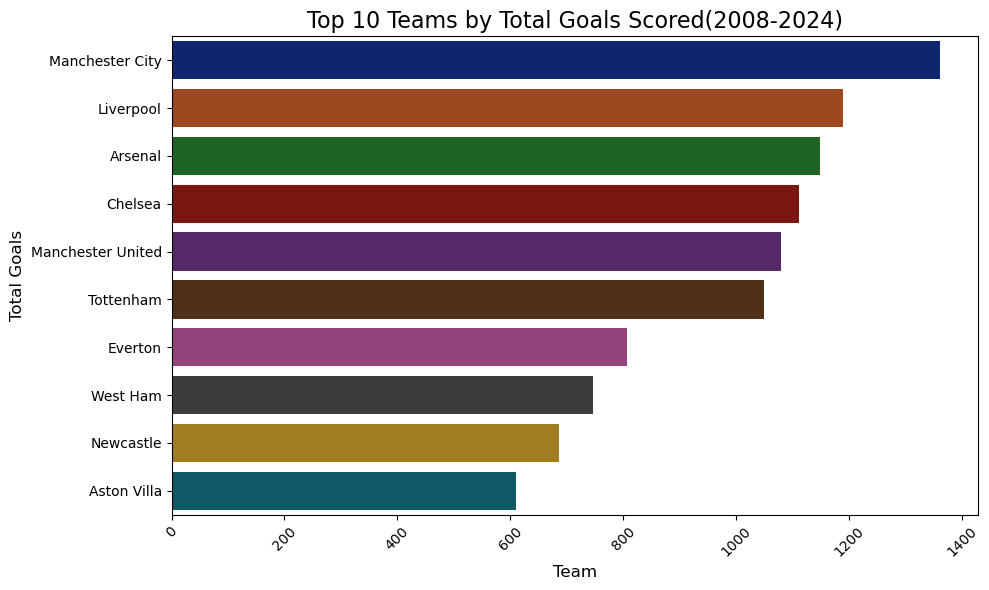

In [6]:
goals_home = df.groupby('HomeTeam')['FTHG'].sum()
goals_away = df.groupby('AwayTeam')['FTAG'].sum()

total_goals = goals_home.add(goals_away,fill_value=0)

goals_df =total_goals.reset_index()
goals_df.columns = ['Team','TotalGoals']

goals_df = goals_df.sort_values(by='TotalGoals', ascending=False)
top_10 = goals_df.head(10)

top_10.to_excel("Top_10_Teams_Scored_Goals.xlsx", index=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='TotalGoals', y='Team', palette='dark')



plt.title("Top 10 Teams by Total Goals Scored(2008-2024)",fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Total Goals", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\amras\AppData\Local\Temp\ipykernel_14436\2111188258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_referees, x='NumberOfMatches', y='Referee', palette='mako', legend=False)


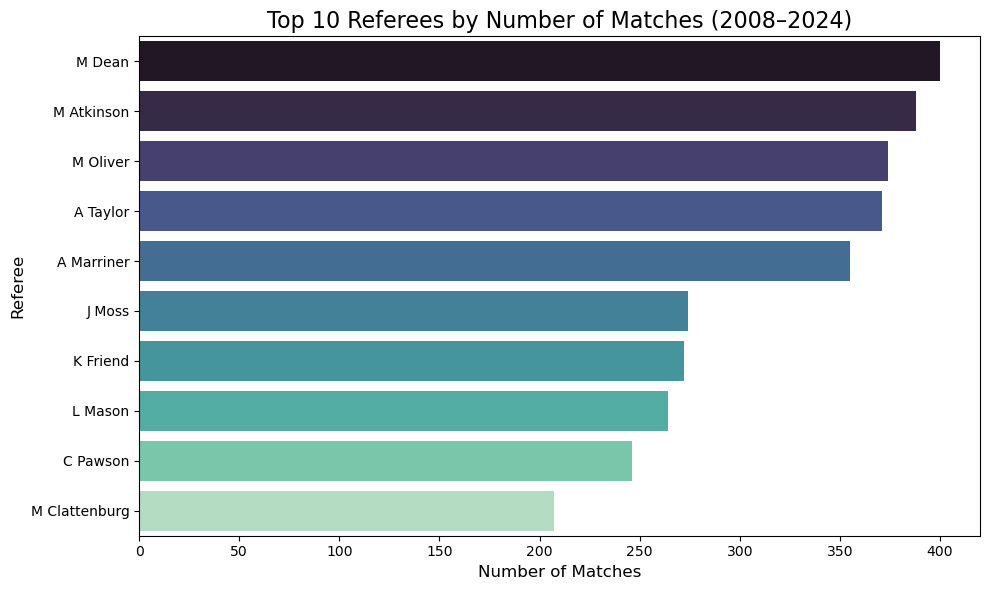

In [ ]:
referee_matches = df['Referee'].value_counts().reset_index()
referee_matches.columns=['Referee','NumberOfMatches']
referee_matches = referee_matches.sort_values(by='NumberOfMatches', ascending=False)

top_referees = referee_matches.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(data=top_referees, x='NumberOfMatches', y='Referee', palette='mako', legend=False)

plt.title("Top 10 Referees by Number of Matches (2008–2024)", fontsize=16)
plt.xlabel("Number of Matches", fontsize=12)
plt.ylabel("Referee", fontsize=12)
plt.tight_layout()
plt.show()

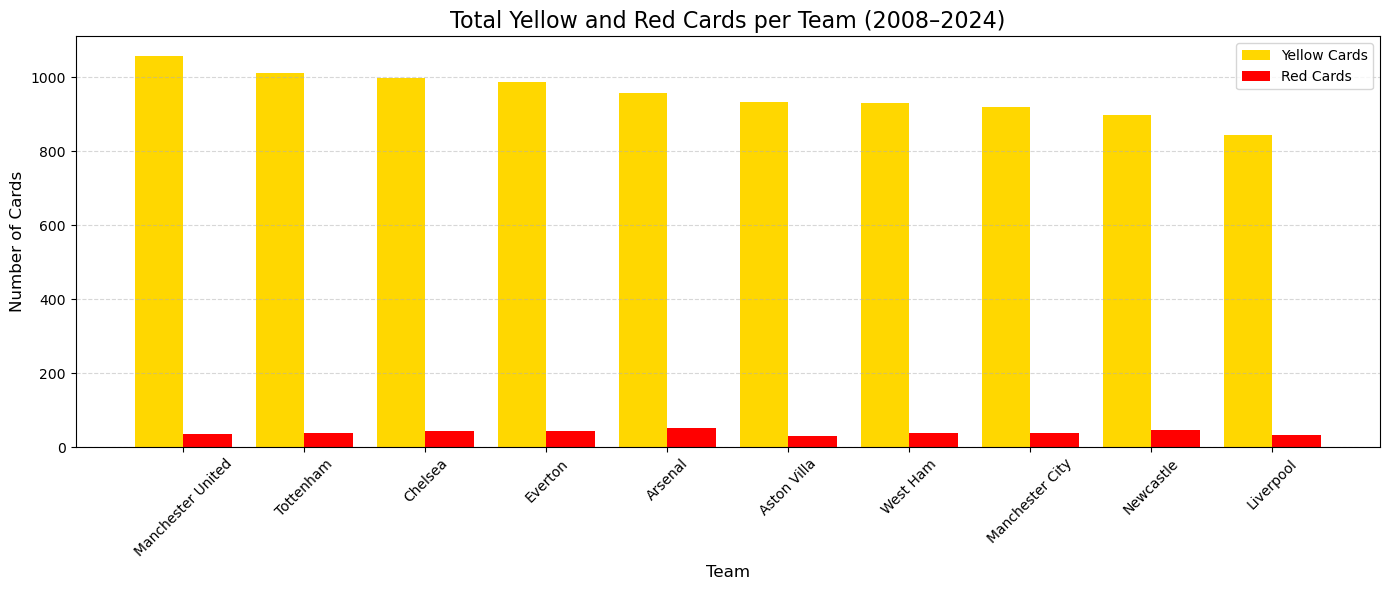

In [26]:
# Yellow cards
yellow_home = df.groupby('HomeTeam')['HY'].sum()
yellow_away = df.groupby('AwayTeam')['AY'].sum()
total_yellow = yellow_home.add(yellow_away, fill_value=0)

# Red Cards
red_home = df.groupby('HomeTeam')['HR'].sum()
red_away = df.groupby('AwayTeam')['AR'].sum()
total_red = red_home.add(red_away,fill_value=0)

cards_df = pd.DataFrame({
    'Team':total_yellow.index,
    'YellowCards': total_yellow.values,
    'RedCards': total_red.values
})
cards_df = cards_df.sort_values(by='YellowCards', ascending=False)
topcards_10 = cards_df.head(10)


plt.figure(figsize=(14, 6))
x = range(len(topcards_10))
width = 0.4

plt.bar([i - width/2 for i in x], topcards_10['YellowCards'], width=width, label='Yellow Cards', color='gold')
plt.bar([i + width/2 for i in x], topcards_10['RedCards'], width=width, label='Red Cards', color='red')


plt.xticks(ticks=x, labels=topcards_10['Team'], rotation=45)

plt.title("Total Yellow and Red Cards per Team (2008–2024)", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Cards", fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [5]:
import pandas as pd


def calculate_points(row):
    if row['FTR'] == 'H':
        return 3 if row['IsHome'] else 0
    elif row['FTR'] == 'A':
        return 0 if row['IsHome'] else 3
    elif row['FTR'] == 'D':
        return 1
    else:
        return 0


def calculate_result(row):
    if row['FTR'] == 'H':
        return 'Win' if row['IsHome'] else 'Loss'
    elif row['FTR'] == 'A':
        return 'Loss' if row['IsHome'] else 'Win'
    elif row['FTR'] == 'D':
        return 'Draw'
    else:
        return 'Unknown'


home = df[['Season', 'HomeTeam', 'FTHG', 'FTAG', 'FTR']].copy()
home.columns = ['Season', 'Team', 'GoalsFor', 'GoalsAgainst', 'FTR']
home['IsHome'] = True


away = df[['Season', 'AwayTeam', 'FTAG', 'FTHG', 'FTR']].copy()
away.columns = ['Season', 'Team', 'GoalsFor', 'GoalsAgainst', 'FTR']
away['IsHome'] = False


team_matches = pd.concat([home, away], ignore_index=True)


team_matches['Points'] = team_matches.apply(calculate_points, axis=1)
team_matches['Result'] = team_matches.apply(calculate_result, axis=1)


summary = team_matches.groupby(['Season', 'Team']).agg({
    'GoalsFor': 'sum',
    'GoalsAgainst': 'sum',
    'Points': 'sum',
    'Result': lambda x: (x == 'Win').sum()
}).rename(columns={'Result': 'Wins'}).reset_index()


results_counts = team_matches.pivot_table(
    index=['Season', 'Team'],
    columns='Result',
    aggfunc='size',
    fill_value=0
).reset_index()


final = pd.merge(summary, results_counts, on=['Season', 'Team'], how='left')


final = final.rename(columns={
    'Draw': 'Draws',
    'Loss': 'Losses',
}).fillna(0)  

final[['GoalsFor', 'GoalsAgainst', 'Wins', 'Draws', 'Losses', 'Points']] = final[['GoalsFor', 'GoalsAgainst', 'Wins', 'Draws', 'Losses', 'Points']].astype(int)


final = final[['Season', 'Team', 'GoalsFor', 'GoalsAgainst', 'Wins', 'Draws', 'Losses', 'Points']]
final.to_excel("Team_Goals_Points_Wins_By_Season.xlsx", index=False)

top_3_teams = final.sort_values(['Season', 'Points'], ascending=[True, False]).groupby('Season').head(3)

print(top_3_teams.head())


       Season               Team  GoalsFor  GoalsAgainst  Wins  Draws  Losses  \
10  2008-2009  Manchester United        68            24    28      6       4   
8   2008-2009          Liverpool        77            27    25     11       2   
4   2008-2009            Chelsea        68            24    25      8       5   
26  2009-2010            Chelsea       103            32    27      5       6   
32  2009-2010  Manchester United        86            28    27      4       7   

    Points  
10      90  
8       86  
4       83  
26      86  
32      85  


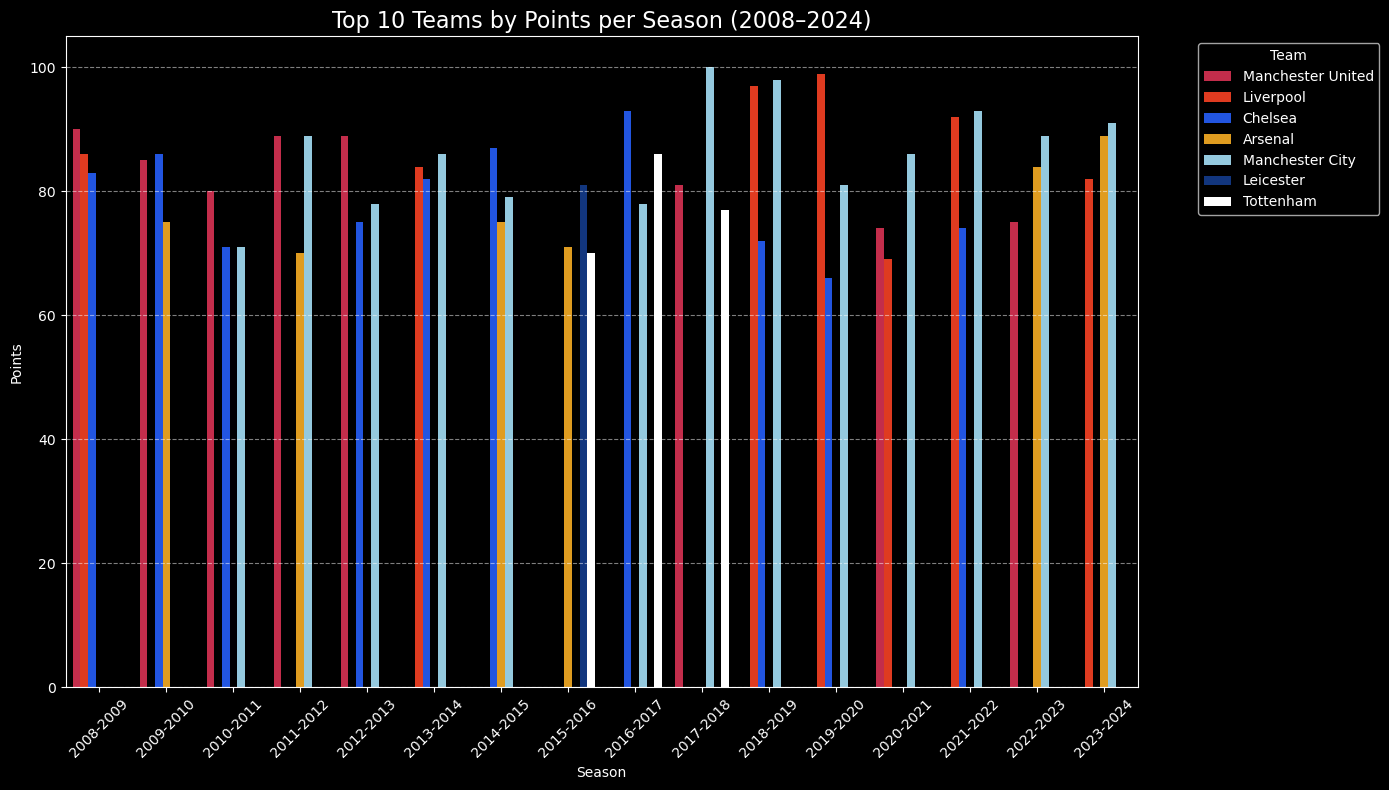

In [6]:
teams = top_3_teams['Team'].unique()
custom_palette = {
    'Manchester City': '#87CEEB',   
    'Liverpool': '#FF2400',         
    'Manchester United': '#DC143C', 
    'Chelsea': '#0346ff',           
    'Arsenal': '#FFA500',           
    'Tottenham': '#FFFFFF',         
    'Leicester': '#003090',         
}

plt.style.use('dark_background')
plt.figure(figsize=(14, 8))
sns.barplot(data=top_3_teams, x='Season', y='Points', hue='Team',palette = custom_palette, dodge=True)
plt.title("Top 10 Teams by Points per Season (2008–2024)", fontsize=16)
plt.xlabel("Season")
plt.ylabel("Points")
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

C:\Users\amras\AppData\Local\Temp\ipykernel_4344\3371321862.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teams, x='Team', y='TotalOverperform', palette='coolwarm')


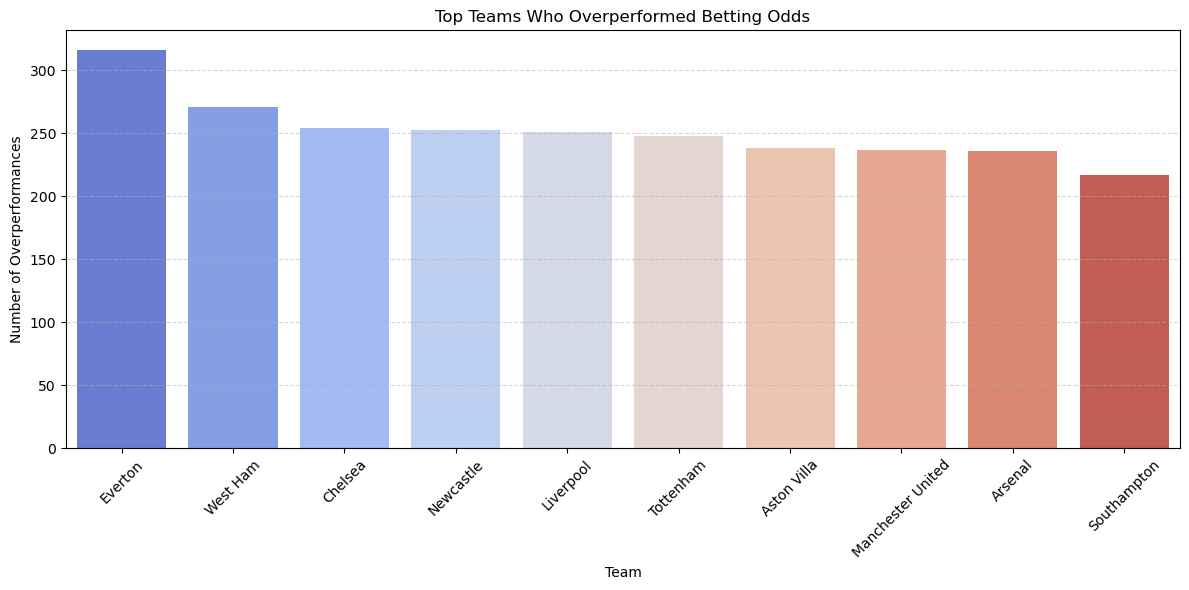

In [5]:
matches = df.copy()

matches = matches.dropna(subset=['B365H', 'B365D', 'B365A', 'FTR'])

matches[['B365H', 'B365D', 'B365A']] = matches[['B365H', 'B365D', 'B365A']].astype(float)

def get_expected_result(row):
    odds = {
        'H': row['B365H'],
        'D': row['B365D'],
        'A': row['B365A']
    }
    return min(odds, key=odds.get)

matches['ExpectedResult'] = matches.apply(get_expected_result, axis=1)
matches['Overperformed'] = matches['FTR'] != matches['ExpectedResult']

home_overperf = matches.groupby('HomeTeam')['Overperformed'].sum().reset_index()
home_overperf.columns = ['Team', 'HomeOverperform']

away_overperf = matches.groupby('AwayTeam')['Overperformed'].sum().reset_index()
away_overperf.columns = ['Team', 'AwayOverperform']

total_overperf = pd.merge(home_overperf, away_overperf, on='Team', how='outer').fillna(0)
total_overperf['TotalOverperform'] = total_overperf['HomeOverperform'] + total_overperf['AwayOverperform']

total_overperf.head()


plt.figure(figsize=(12, 6))
top_teams = total_overperf.sort_values('TotalOverperform', ascending=False).head(10)

sns.barplot(data=top_teams, x='Team', y='TotalOverperform', palette='coolwarm')
plt.title("Top Teams Who Overperformed Betting Odds")
plt.ylabel("Number of Overperformances")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()